In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
import warnings
#Importing all the libraries

In [31]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)
#reading the data set KC_House_Data.CSV
#bringing in the first 10 rows to see if the data has been uploaded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [32]:
df.info()
#gives us info on what the data type is - example: float will give us a decimal value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [33]:
df = df.drop(['date', 'lat', 'long', 'view', 'yr_renovated', 'id'], axis = 1) 
#dropping off some fields that we do not need

In [34]:
df.head(10)
#to validate that the fields have been removed

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,98003,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1060,0.0,1963,98198,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730.0,1960,98146,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0.0,2003,98038,2390,7570


In [35]:
zl = len(df[df['waterfront'] == 0.0])
ol = len(df[df['waterfront'] == 1.0])
l = len(df) - len(df[df['waterfront'].isna()])

df['waterfront'] = df['waterfront'].fillna((np.random.choice([0, 1], p=[zl/l, ol/l])))
df['waterfront'].value_counts()
# Filling waterfront missing data randomly with proportion of 0's and 1's.
# Doing a count on how many homes have waterfront and how many do not.

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [36]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace = '?', value = 0.0)
df['sqft_basement'] = df['sqft_basement'].astype(str).astype(float)
# Change the question mark values to 0's
# Converting string to float - example, 0 to 0.0

In [37]:
df = df[df['grade'] != 1 ]
df = df[df['grade'] != 2 ]
df = df[df['grade'] != 3 ]
df = df[df['grade'] != 4 ]
df = df[df['grade'] != 13 ]
#excluding grade2 1-4 & 13

In [38]:
z_scores = stats.zscore(df.drop(['waterfront'], axis = 1))

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
#removing outliers that is mre than 3 standard deviations from the mean

In [39]:
abs(new_df.corr())> 0.70
# using .7 to check for correlation between the different variables. 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False


In [40]:
new_df = new_df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
#dropping off the above fields given they have a coorelation of 70 or higher provided by the multicollinearity graph

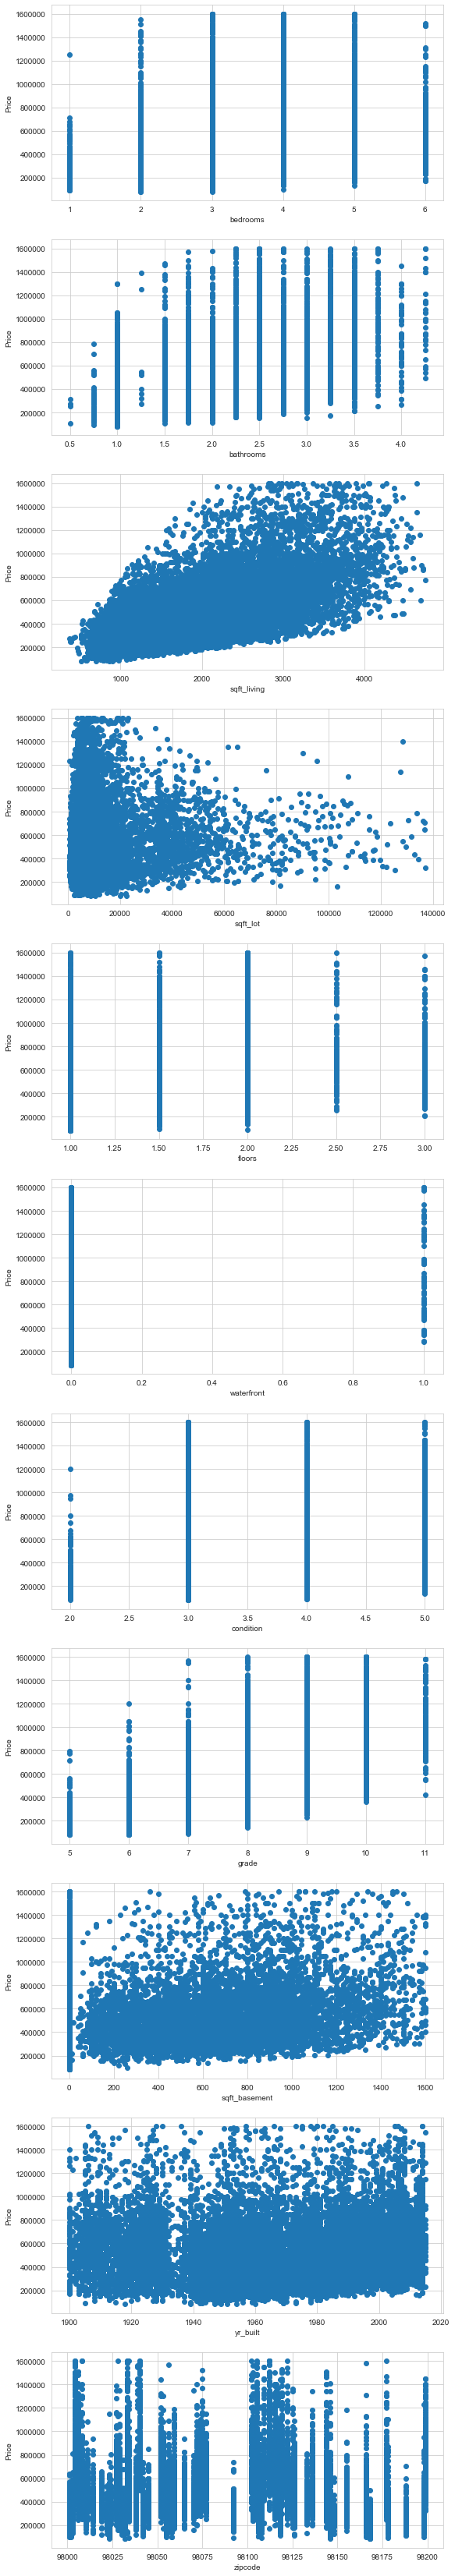

In [41]:
scatterplot_data = new_df.drop(['price'], axis = 1)
fig, axs = plt.subplots(11, figsize = (9, 60))
for index, col in enumerate(scatterplot_data.columns):
    axs[index].scatter(scatterplot_data[col], new_df['price'])
    axs[index].set_ylabel('Price')
    axs[index].set_xlabel(col)

In [42]:
waterfront = new_df.waterfront.astype('category')
waterfront_dummy = pd.get_dummies(waterfront, prefix = 'waterfront', drop_first = True)
#converting the following varibales to catergorials

In [43]:
bedrooms = new_df.bedrooms.astype('category')
bedroom_dummies = pd.get_dummies(bedrooms, prefix = 'bedroom', drop_first = True)
#converting the following varibales to catergorials

In [44]:
conditions = new_df.condition.astype('category')
condition_dummies = pd.get_dummies(conditions, prefix = 'condition', drop_first = True)
#converting the following varibales to catergorials

In [45]:
floors = new_df.floors.astype('category')
floors_dummies = pd.get_dummies(floors, prefix = 'floor', drop_first = True)
#converting the following varibales to catergorials

In [46]:
zipcodes = new_df.zipcode.astype('category')
zipcodes_dummies = pd.get_dummies(zipcodes, prefix = 'zip', drop_first = True)
#converting the following varibales to catergorials

In [47]:
df = new_df.drop(['waterfront', 'bedrooms', 'zipcode', 'condition', 'floors'], axis = 1)
df = pd.concat([df, waterfront_dummy, bedroom_dummies, zipcodes_dummies, condition_dummies, floors_dummies], axis = 1)

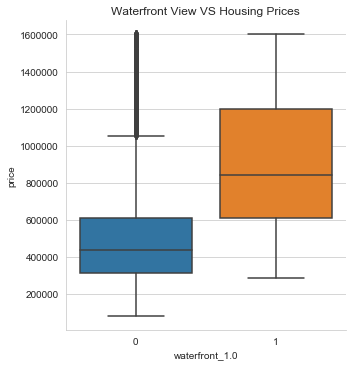

In [48]:
# Box plot comparison of house prices with no waterfront view vs house prices with waterfront view.
sns.set_style("whitegrid") 
ax = sns.catplot(x="waterfront_1.0", y="price", kind="box", data=df)
plt.title('Waterfront View VS Housing Prices')
plt.savefig('WaterFrontView.png',dpi=300, bbox_inches = "tight")
#based on the boxplot, not having a waterfront view, provides a lower mean

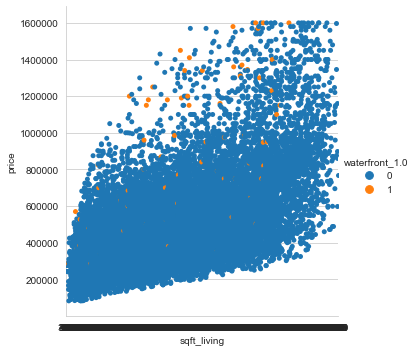

In [49]:
ax = sns.catplot(x='sqft_living', y="price", hue = 'waterfront_1.0', data=df);

In [50]:
zip_df = new_df
zip_df.zipcode = zip_df.zipcode.astype(int)
#new dataframe converting zipcode to interger

In [51]:
zipcode_means = []
for i in zip_df.zipcode.unique().tolist():
    val = new_df[new_df['zipcode'] == int(i)]['price'].mean()
    zipcode_means.append([str(i), val])
#looping through each zipcode in the dataset and getting its value
#getting the average price of homes based on zipcodes

In [52]:
def sortSecond(val): 
    return val[1] 
zipcode_means.sort(key = sortSecond, reverse = True)
#sorting zipcodes

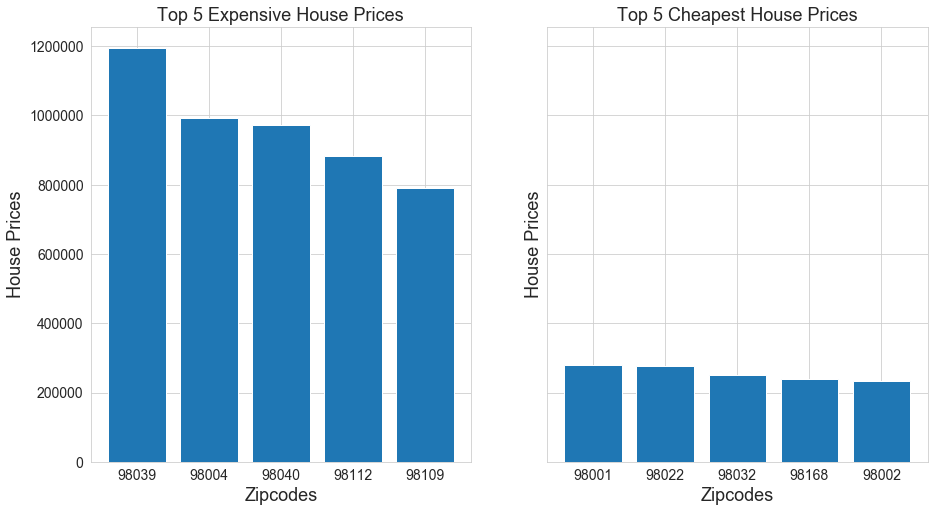

In [53]:
xtop = []
ytop = []
xlow = []
ylow = []
for val in zipcode_means[:5]:
    xtop.append(val[0])
    ytop.append(val[1])
for val in zipcode_means[-5:]:
    xlow.append(val[0])
    ylow.append(val[1])
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (15, 8))

ax1.bar(xtop, ytop)
ax1.set_title("Top 5 Expensive House Prices", fontsize = 18)
ax1.set_ylabel('House Prices', fontsize = 18)
ax1.set_xlabel('Zipcodes', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.bar(xlow, ylow)
ax2.set_title("Top 5 Cheapest House Prices", fontsize = 18)
ax2.set_ylabel('House Prices', fontsize = 18)
ax2.set_xlabel('Zipcodes', fontsize = 18)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.savefig('zipcodes.png')
#going through the zipcodes and listing the top 5 move expensive and top 5 lrast expensive homes based on price

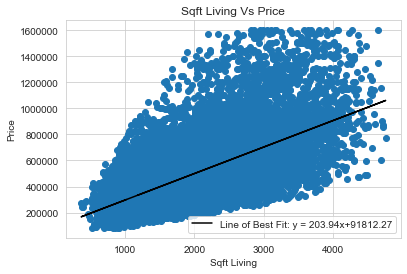

In [54]:
x = df.sqft_living
y = df.price
plt.scatter(x, y)
# We can see a positive correlation.
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = 'black', label = 'Line of Best Fit: y = {}x+{}'.format(round(m, 2), round(b, 2)))
plt.title('Sqft Living Vs Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.savefig('SqftLivingPrice.png',dpi=300, bbox_inches = "tight")

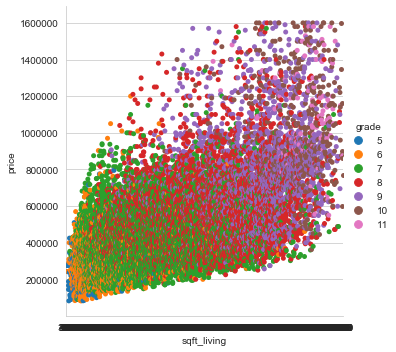

In [55]:
ax = sns.catplot(x='sqft_living', y="price", hue = 'grade', data=df);
#graphing based on the grade level 

In [56]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [57]:
predictors_int = sm.add_constant(X)
model1 = sm.OLS(df['price'],predictors_int).fit()
model1.rsquared_adj
#80% of the data are represented by the variables 

C:\Users\princ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8148029017327278

In [ ]:
#Conclusion, After cleaning up the data, model performed at an 81% accuracy accross all data. We deleted columns that were not needed for this project. 
#Waterfront view, higher grade, size of the house and location made the biggest impact on the house price.